<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
from google.colab import files
uploaded = files.upload()

Saving DMV_Written_Tests.csv to DMV_Written_Tests (1).csv


In [4]:
df = pd.read_csv("DMV_Written_Tests.csv")
df.head()   # shows the first 5 rows

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


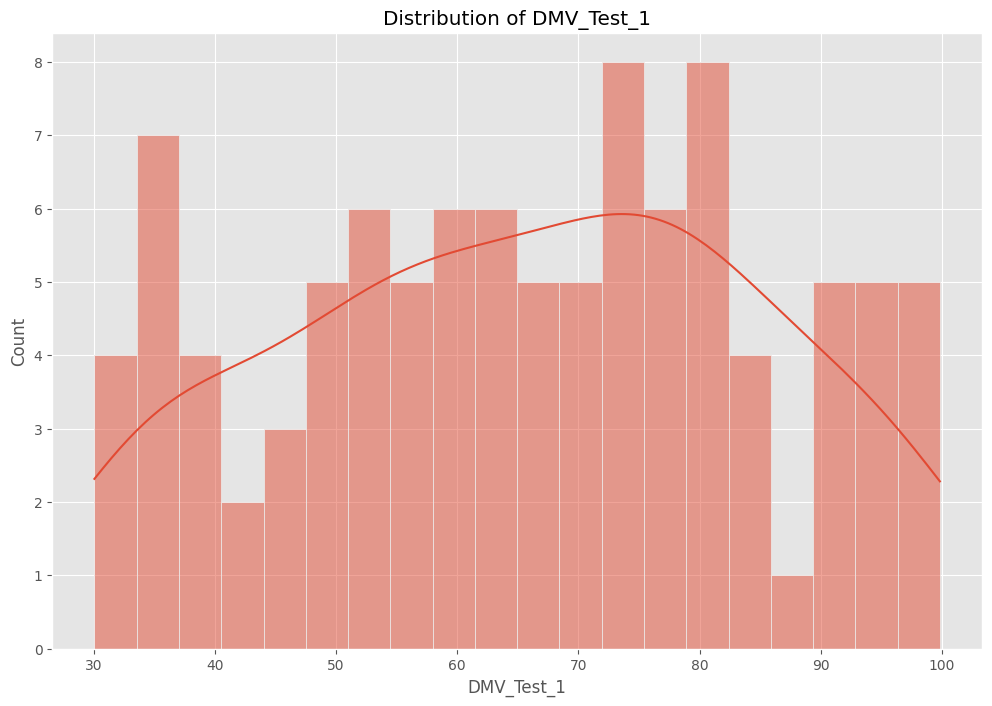

In [5]:
df.info()
df.describe()

sns.histplot(df['DMV_Test_1'], bins=20, kde=True)
plt.title("Distribution of DMV_Test_1")
plt.show()


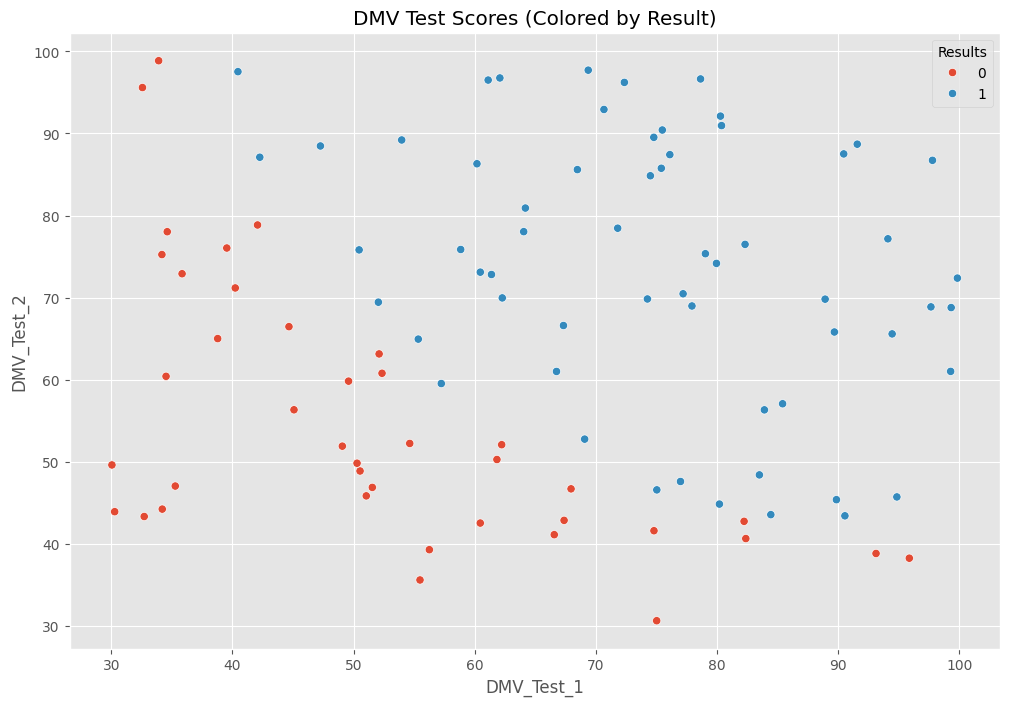

In [6]:
sns.scatterplot(data=df, x="DMV_Test_1", y="DMV_Test_2", hue="Results")
plt.title("DMV Test Scores (Colored by Result)")
plt.show()


### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_proba(W, b, X):
    return sigmoid(X @ W + b)


def log_loss(p, y):
    eps = 1e-12               # avoid log(0)
    p = np.clip(p, eps, 1-eps)
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))


def gradients(W, b, X, y):
    p = predict_proba(W, b, X)
    diff = (p - y)              # errors
    dW = (X.T @ diff) / X.shape[0]   # weight gradients
    db = np.mean(diff)               # bias gradient
    return dW, db, p


In [8]:
# Assume we pick some weights
w0, w1, w2 = -30, 0.2, 0.3   # bias, test1 weight, test2 weight

X1 = df['DMV_Test_1'].values
X2 = df['DMV_Test_2'].values

z = w0 + w1*X1 + w2*X2
probs = sigmoid(z)

print(probs[:10])  # first 10 probabilities


[5.82279924e-01 2.09330874e-05 2.76906459e-01 9.99640014e-01
 9.99777389e-01 1.64890383e-02 9.99985976e-01 2.63307732e-01
 9.99989307e-01 4.86648671e-01]


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [9]:
# Extract features and labels
X = df[['DMV_Test_1', 'DMV_Test_2']].values
y = df['Results'].values.astype(float)

# Initialize parameters
W = np.zeros(X.shape[1])   # (2,)
b = 0.0

# Compute gradients and cost
dW, db, p = gradients(W, b, X, y)
J = log_loss(p, y)

print("Cost J(θ):", J)
print("Gradient dW:", dW)
print("Gradient db:", db)


Cost J(θ): 0.6931471805599453
Gradient dW: [-12.00921659 -11.26284221]
Gradient db: -0.1


### Task 6: Cost and Gradient at Initialization
---

In [10]:
# --- Task 6: Cost and Gradient at Initialization ---

# Features and labels
X = df[['DMV_Test_1', 'DMV_Test_2']].values
y = df['Results'].values.astype(float)

# Initialize weights and bias to zero
W = np.zeros(X.shape[1])   # [0, 0]
b = 0.0

# Compute gradients and cost at initialization
dW, db, p = gradients(W, b, X, y)
J = log_loss(p, y)

print("Cost J(θ) at initialization:", J)
print("Gradient dW at initialization:", dW)
print("Gradient db at initialization:", db)


Cost J(θ) at initialization: 0.6931471805599453
Gradient dW at initialization: [-12.00921659 -11.26284221]
Gradient db at initialization: -0.1


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [11]:
def gradient_descent(X, y, lr=0.01, num_iter=1000):
    m, n = X.shape
    W = np.zeros((n, 1))  # initialize weights
    b = 0.0               # initialize bias

    cost_history = []

    for i in range(num_iter):
        # 1. Compute gradients and predictions
        dW, db, p = gradients(W, b, X, y)

        # 2. Update parameters
        W -= lr * dW
        b -= lr * db

        # 3. Compute cost for monitoring
        if i % 100 == 0 or i == num_iter-1:   # log every 100 steps
            cost = log_loss(p, y)
            cost_history.append(cost)
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return W, b, cost_history


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$